# NoteBook Importuri

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constantele

In [4]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-token.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500 #gmail sou hotmail folosec undeva la 10000-15000 de cuvinte 

# Incarcare Datelor

In [5]:
# Features 
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter= ' ')
# Probalilitatile Tokenurilor
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [6]:
x_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calucularea Join Probability
# dot Product

In [7]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [8]:
a.dot(b) # 1*0 + 2*5 +3*4 =22

22

In [9]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is ', c.shape)
print(c)

shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [10]:
print(a.dot(c))
print('shape of the dot product is ', a.dot(c).shape)

[21  9]
shape of the dot product is  (2,)


In [11]:
[1*0 +2*3 + 3*5, 1*6 +2*0 + 3*1]

[21, 9]

In [12]:
# Challenge: Podti sa iti dai seama dimensiunea(shape) dot dintre x_test si prob_token_spam?
x_test.dot(prob_token_spam).shape 

(1724,)

In [13]:
x_test.shape

(1724, 2500)

In [14]:
prob_token_spam.shape

(2500,)

# prior = este guess or a belief about some quantity.


# Set the Prior

# $$P(Spam\ |\ x) = \frac{P(x\ |\ Spam\,)\ P(Spam)}{P(x)}$$

In [15]:
PROB_SPAM = 0.3113

# Challenge: Do you recall how to take the log of numpy array? Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam.

In [16]:
np.log(prob_token_spam)

array([ -4.42138316,  -5.26547074,  -5.00048008, ..., -10.72079186,
        -8.88821039,  -8.77488171])

# Join probability in log format

In [17]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)# x_test.dot((Probabilitatea ca un token sa fie spam) - (probabilitatea de aparitie a token in oricare email fie el spam ori nonspam)) + (Probalilitatea de aparite a emailurilor)
# P(x) este reprezentat de - np.log(prob_all_tokens)

In [18]:
joint_log_spam[:5]

array([22.36364709,  1.96554866, 17.81052488, 18.24008203, 19.54655995])

# Calculate the log probability that the email are non-spam given their tokens. Store the resultat in a variable called joint_log_ham

# $$ P(Ham\ |\ x) = \frac{P(x\ |\ Ham\,)\ (1-P(Spam))}{P(x)}$$

In [19]:

joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) +  np.log(1- PROB_SPAM)

In [20]:
joint_log_ham[:5]

array([-58.94932089, -10.85639215, -34.75457052, -59.03682077,
       -53.09223912])

In [21]:
joint_log_ham.size

1724

In [22]:
# Facem Predictii
## Verifica cel mai mare joint probability

# $$P(spam \, | \,x) >\, P(Ham \, | \, x)$$
<center>**OR**</center>
<br>
# $$ P(spam \, | \,x) <\, P(Ham \, | \, x)$$

SyntaxError: invalid syntax (<ipython-input-22-1c679aabadf9>, line 5)

Challenge: Can you create the vector of predictions, our ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called prediction.

In [23]:
prediction = joint_log_spam > joint_log_ham

In [24]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [25]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

# Simplificare
$$P(x\ |\ Spam)P(Spam) != \frac{P(x\ |\ Spam\)\ P(Spam)}{P(x)}$$ 
totusi relatia dintre ele ramane ne schimbata chiar daca cele doua cantiati nu sunt egale matematic dar simplificare ramane valida deoarece predictia ramane neschimbata

In [26]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = x_test.dot(np.log(prob_token_ham)) +  np.log(1- PROB_SPAM)

# Martics si Evaluare
# Acuratete

In [27]:
correct_doc =( y_test == prediction).sum()
print('Docs classified correctly', correct_doc)
numdocs_wrong = x_test.shape[0] -correct_doc
print('Docs classified incorrecty', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrecty 39


# $Acuratete = \frac{Nr.\ de\ documente\ clasificate\ corect}{Total\ nr\ de\ documente}$
# $Acuratete = \frac{Nr.\ de\ predictii\ corect}{Total\ nr\ de\ predictii}$

In [28]:
# Acuratete
correct_doc/ len(x_test)

0.9773781902552204

In [29]:
fraction_wrong = numdocs_wrong/len(x_test)
print('Fraction classified incorrect is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrect is 2.26%
Accuracy of the model is 97.74%


# Vizualizarea Rezultatelor

In [30]:
#Chart Styling info
yaxis_label = 'P(x | Spam)'
xaxis_label = 'P(x | Nonspam)'


linedata = np.linspace(start=-14000, stop=1, num=1000)

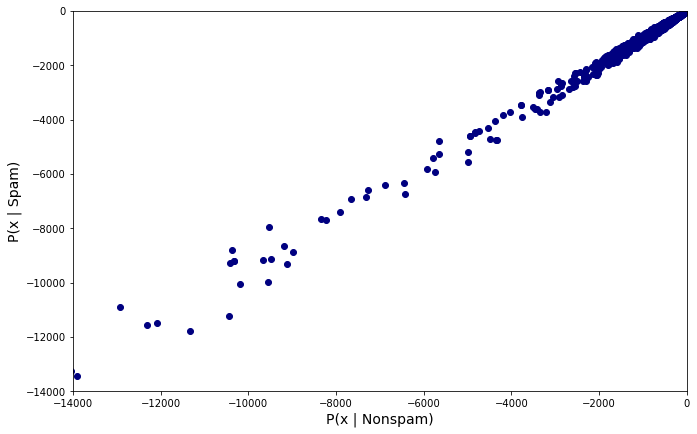

In [31]:
plt.figure(figsize= (11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

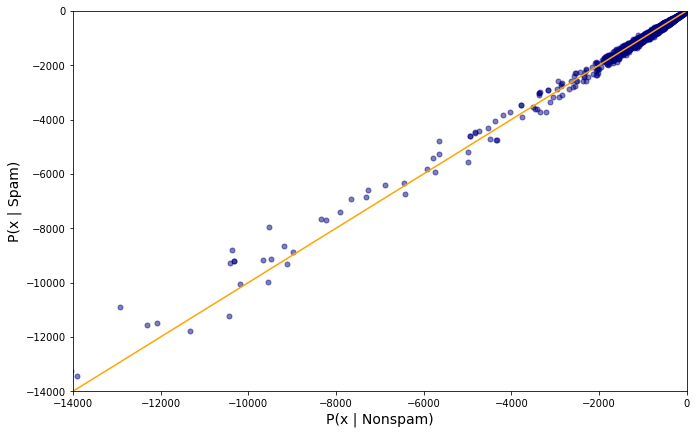

In [32]:
plt.figure(figsize= (11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

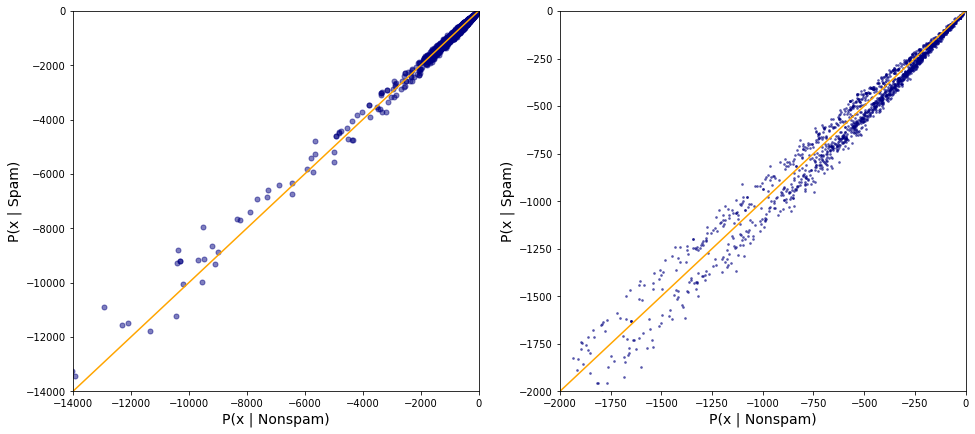

In [33]:
plt.figure(figsize= (16, 7))

#subplot
#chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

#chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')
plt.show()

In [34]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

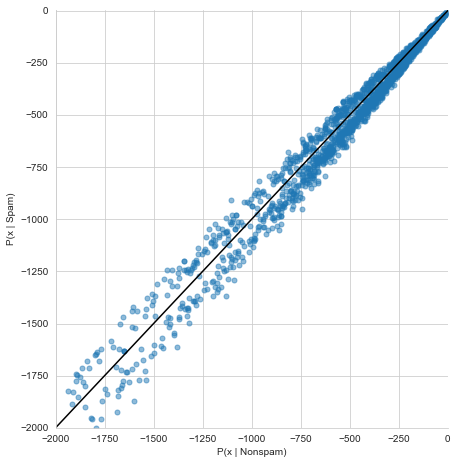

In [35]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data= summary_df, size=6.5, fit_reg=False,
             scatter_kws= {'alpha': 0.5 , 's' : 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata,linedata, color='black')

plt.show()

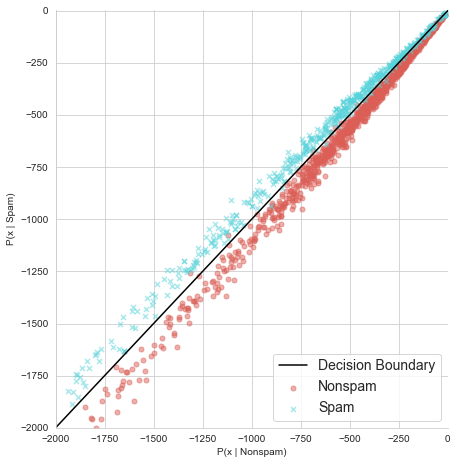

In [36]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data= summary_df, size=6.5, fit_reg=False, 
        legend=False,scatter_kws= {'alpha': 0.5 , 's' : 25}, hue=labels, markers=['o', 'x'], 
        palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata,linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc ='lower right', fontsize=14)

plt.show()

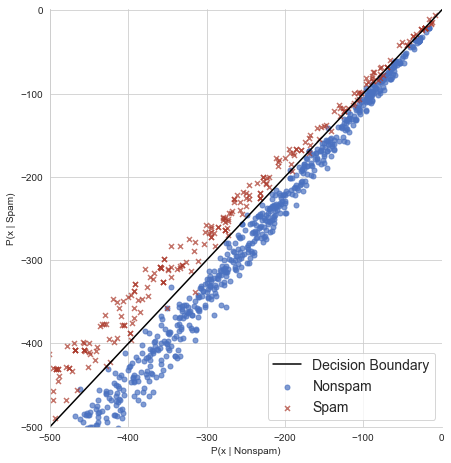

In [37]:
my_colors = [ '#4A71C0','#AB3A2C']# resurse pentru culori www.colorlisa.com

sns.lmplot(x=xaxis_label, y=yaxis_label, data= summary_df, size=6.5, fit_reg=False, 
        legend=False,scatter_kws= {'alpha': 0.7 , 's' : 25}, hue=labels, markers=['o', 'x'], 
        palette=my_colors)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata,linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc ='lower right', fontsize=14)

plt.show()

# False Positive si False Negative

# true_pos = (y_test == 1) & (prediction == 1)#(y_test == 1)= true afirma ca este lup/bolnav/nonspam, (prediction == 1)=pro si confirma ca a fi lup/bolnav/nonspam
# true_neg = (y_test == 0) & (prediction == 0) =se afirma ca  este nu lup/bonl/non-spam,si de fapt  nu  este  lup/bolnav/non-spam
# false_pos = (y_test == 0) & (prediction == 1) # fals=(y_test == 0) se afirma ca este lup/bonlav/spam , pos =(prediction == 1) si se confirma ca nu este lup/bonlav/spam
# false_neg =(y_test == 1) & (prediction == 0)# se afirma ca nu este lup/bonlnav/spam, dar de fapt este lup/bolnav/spam 

In [38]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [39]:
true_pos = (y_test == 1) & (prediction == 1)

In [40]:
true_pos.sum()

568

In [41]:
true_pos

array([ True,  True,  True, ..., False, False, False])

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [44]:
false_pos = (y_test == 0) & (prediction == 1) 
false_pos.sum()

18

In [45]:
false_neg =(y_test == 1) & (prediction == 0)
false_neg.sum()

21

# Recall Score = $\frac{True Positiv}{True Positive + False Negative}$
Recall = 1 =>True positiv

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [48]:
recall_score = true_pos.sum()/ (true_pos.sum() + false_neg.sum())
print('Valorea lui Recall Score este: {:.2%}'.format(recall_score))

Valorea lui Recall Score este: 96.43%


# Precision Score = $\frac{True Positive}{\sum (True Positiv + False Positiv)}$

# Precision este o masurare a calitati, o precisieo inalta(=1) relates to a low false positive rate. (false positiv = non-spam)
# Exista o releatie invers proportionala intre Recall si Precision, cand unul este mare(=1) celalat este mic(=0).

**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [50]:
precision_score = true_pos.sum()/ (true_pos.sum() + false_pos.sum())
print('Valorea lui Precision Score este: {:.3}'.format(precision_score))

Valorea lui Precision Score este: 0.969


# F-Score = $2 x \frac{Precision\ x\ Recall}{precsision\ +\ Recall}$


In [52]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score este {:.2}'.format(f1_score))

F Score este 0.97
